# Import Thư Viện

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
import numpy as np
%matplotlib inline
folder_ds='/content/drive/MyDrive/Visualization/'
drive.mount('/content/drive', force_remount=True)
# đọc dữ liệu và lưu vào biến df
df=pd.read_csv(folder_ds+'WA_Fn-UseC_-HR-Employee-Attrition.csv')

#**Thông tin mô tả dữ liệu**

In [ ]:
#cho biết kiểu dữ liệu của df
print(df.dtypes)
#cho biết kích thước của df
print(df.shape)
#Hiển thị các tên cột của df
print(df.columns)
#Hiển thị thông tin 5 dòng đầu của df
print(df.head(5))
#Hiển thị thông tin 5 dòng cuối của df
print(df.tail(5))

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [ ]:
#Kiểm tra giá trị null
df.isnull().values.any()

False

In [ ]:
#Kiểm tra giá trị trùng lặp
df.duplicated().values.any()

False

In [ ]:
#Hiển thị thông tin mô tả của df
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


# Tiền xử lí dữ liệu

# Data Cleansing

In [ ]:
#loại bỏ các thuộc tính thừa và đồng nhất
for key in df.keys():
   if len(df[key].unique())==1:
       df.drop(key,axis=1,inplace=True)
       print('Dropped attribute: %s'%key)
# Bỏ đi một số thuộc tính dư thừa
df.drop({'EmployeeNumber','JobRole'}, axis=1, inplace=True)


Dropped attribute: EmployeeCount
Dropped attribute: Over18
Dropped attribute: StandardHours


In [ ]:
# Xác định ordinal variables
ordinal_vars=['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']
df.keys()


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

<Figure size 800x500 with 0 Axes>

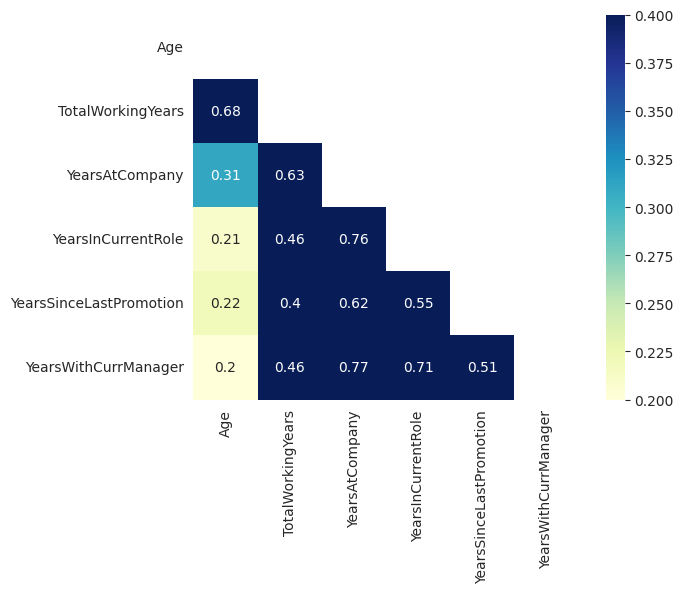

In [ ]:
# Phân biệt thuộc tính để kiểm tra tương quan gồm các biến về thời gian và các biến về lương
time_params=['Age','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
salary_params=['DailyRate','HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike','StockOptionLevel']
# Tìm mối tương quan giữa các tham số thời gian
# Tương quan tối đa cho phép là 0,4
corr_df=df[time_params].corr().round(2)
max_corr = 0.4
plt.figure(figsize=(8,5))
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
   f, ax = plt.subplots(figsize=(7, 5))
   ax = sns.heatmap(corr_df, mask=mask,vmax=max_corr, square=True, annot=True, cmap="YlGnBu")


In [ ]:
# Loại bỏ các tính năng có mối tương quan cao
df.drop({'TotalWorkingYears','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'}, axis=1, inplace=True)


<Figure size 800x500 with 0 Axes>

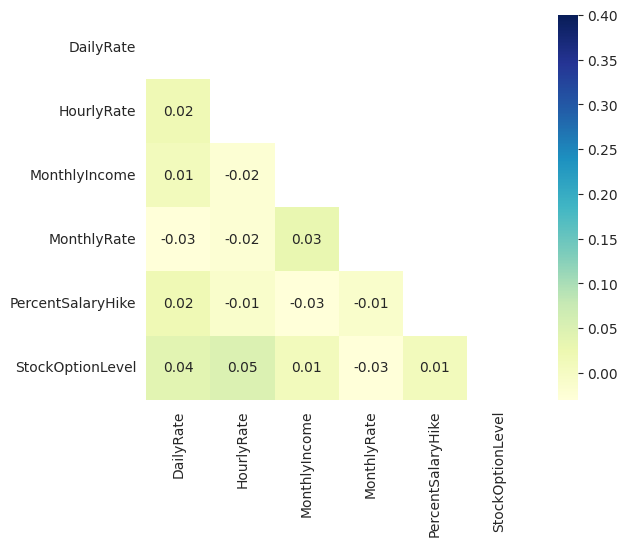

In [ ]:
# Tìm mối tương quan giữa các thông số Lương
# Tương quan tối đa cho phép là 0,4
corr_df=df[salary_params].corr().round(2)
max_corr = 0.4
plt.figure(figsize=(8,5))
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
  f, ax = plt.subplots(figsize=(7, 5))
  ax = sns.heatmap(corr_df, mask=mask,vmax=max_corr, square=True, annot=True, cmap='YlGnBu')


In [ ]:
df.keys()

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

# Creating Dummies

In [ ]:
# Phân tích các biến định tính
df.select_dtypes('object').head()
print('Levels of categories: ')
for key in df.select_dtypes('object').keys():
   print(key ,':' ,df[key].unique())


Levels of categories: 
Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender : ['Female' 'Male']
MaritalStatus : ['Single' 'Married' 'Divorced']
OverTime : ['Yes' 'No']


In [ ]:
# Lấy biến giả cho các biến định tính
df= pd.get_dummies(df,columns=df.select_dtypes('object').keys(), prefix=df.select_dtypes('object').keys())
df.keys()


Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'Attrition_No', 'Attrition_Yes',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_No',
       'OverTime_Yes'],
      dtype

In [ ]:
# Xoá base dummy attributes để tránh dummy variable trap
df.drop({'Attrition_No','BusinessTravel_Non-Travel','Department_Human Resources',
        'EducationField_Human Resources','Gender_Female', 'MaritalStatus_Single','OverTime_No'}, axis=1,inplace=True)
# Vi phân cho các biến giả
cont_vars=df.select_dtypes('int').keys()
dummies= df.select_dtypes('uint8').keys().drop('Attrition_Yes')
dummies


Index(['BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'MaritalStatus_Divorced', 'MaritalStatus_Married', 'OverTime_Yes'],
      dtype='object')

# Eliminate outliers



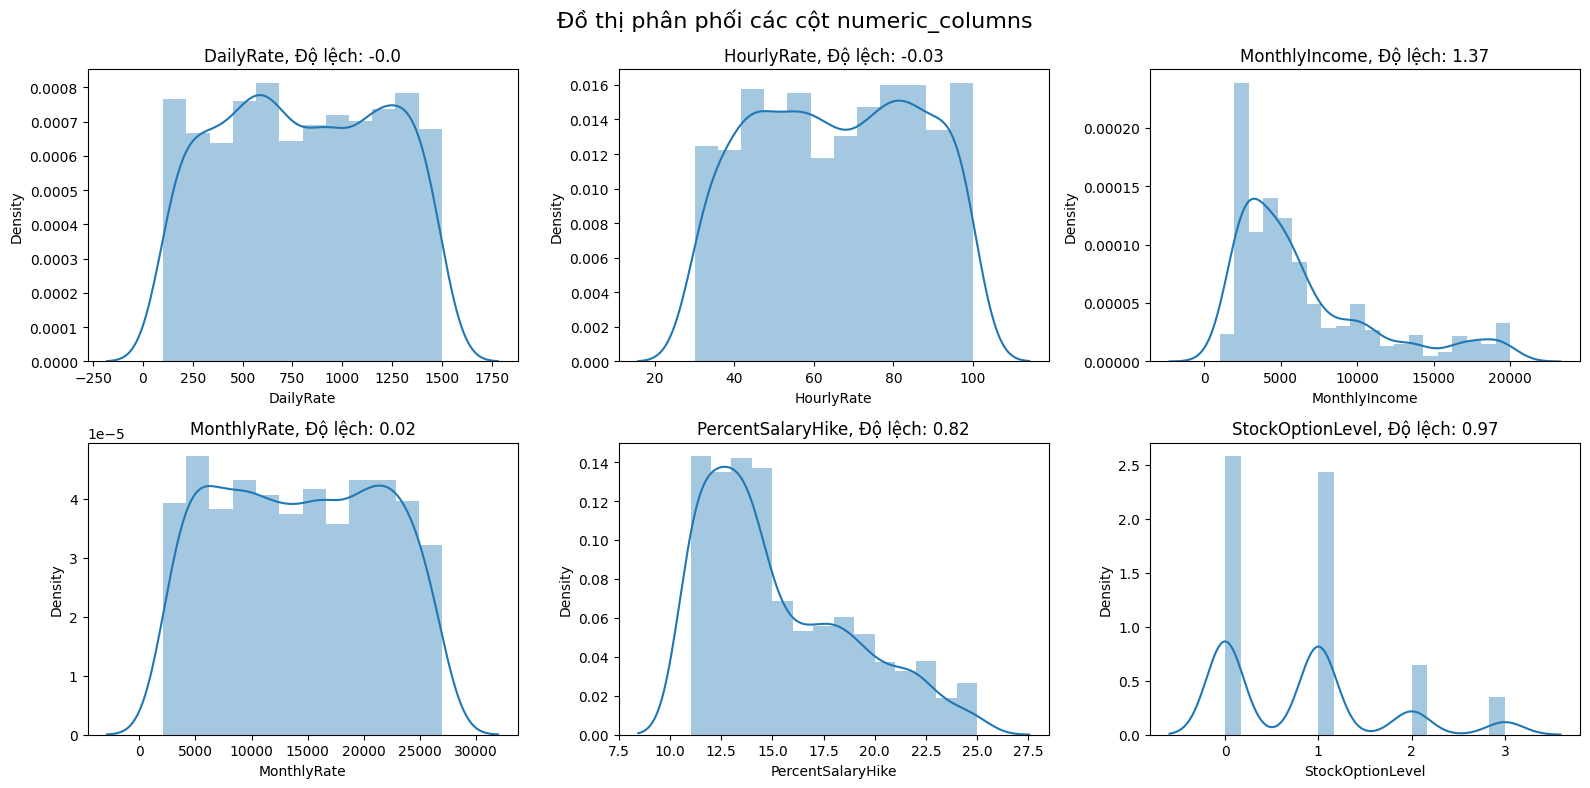

In [ ]:
#Vẽ biểu đồ distplot cho các cột nằm trong Salary_Params
#Bỏ qua các cảnh báo
import warnings
warnings.filterwarnings("ignore")
def distplot(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, figsize=(16, 8))
    fig.suptitle(suptitle, size=16)
    axs = axs.flatten()
    for i, data in enumerate(salary_params):
        sns.distplot(dataset[data], ax=axs[i])
        axs[i].set_title(data + ', Độ lệch: ' + str(round(dataset[data].skew(axis=0, skipna=True), 2)))
    plt.tight_layout()  # Đảm bảo không có biểu đồ nào bị đè lên nhau

distplot(dataset=df, columns_list=salary_params, rows=2, cols=3, suptitle='Đồ thị phân phối các cột numeric_columns')
plt.show()

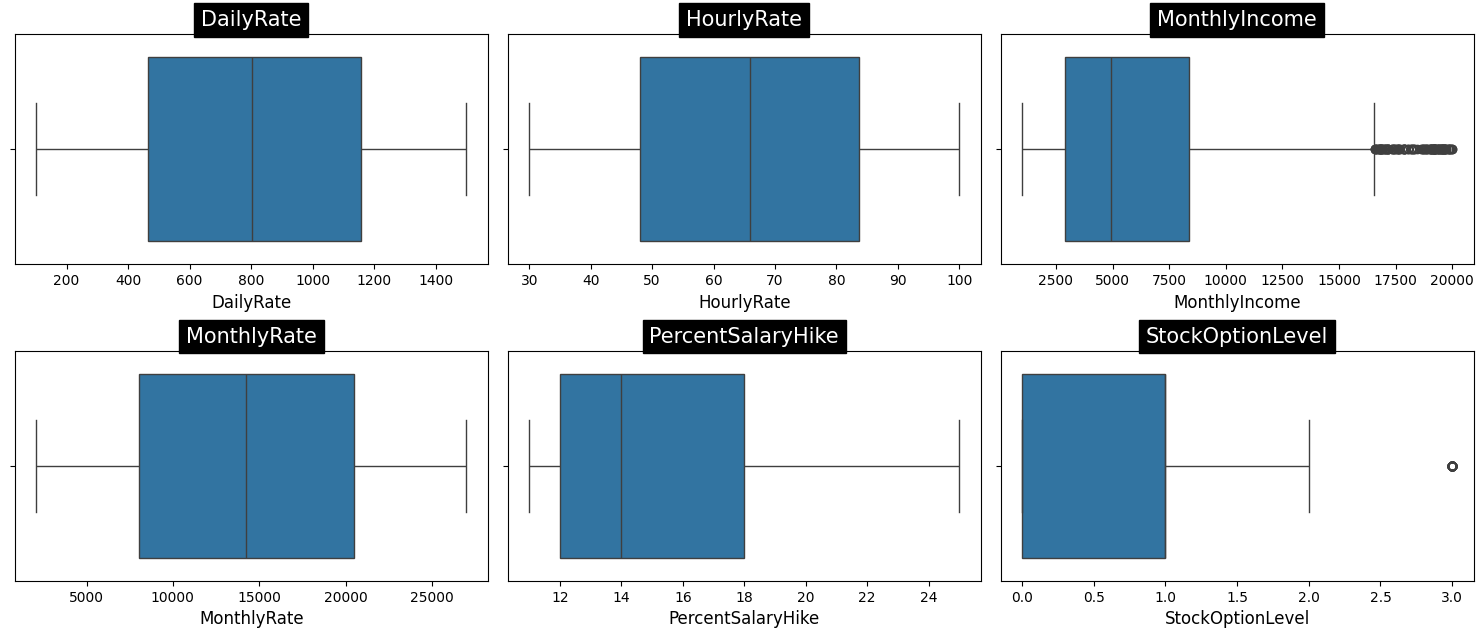

In [ ]:
#Vẽ biểu đồ boxplot
plt.figure(figsize = (15,25))
for idx, i in enumerate(salary_params):
    plt.subplot(8, 3, idx + 1)
    sns.boxplot(x = i, data = df)
    plt.title(i,backgroundcolor='black',color='white',fontsize=15)
    plt.xlabel(i, size = 12)
plt.tight_layout()
plt.show()

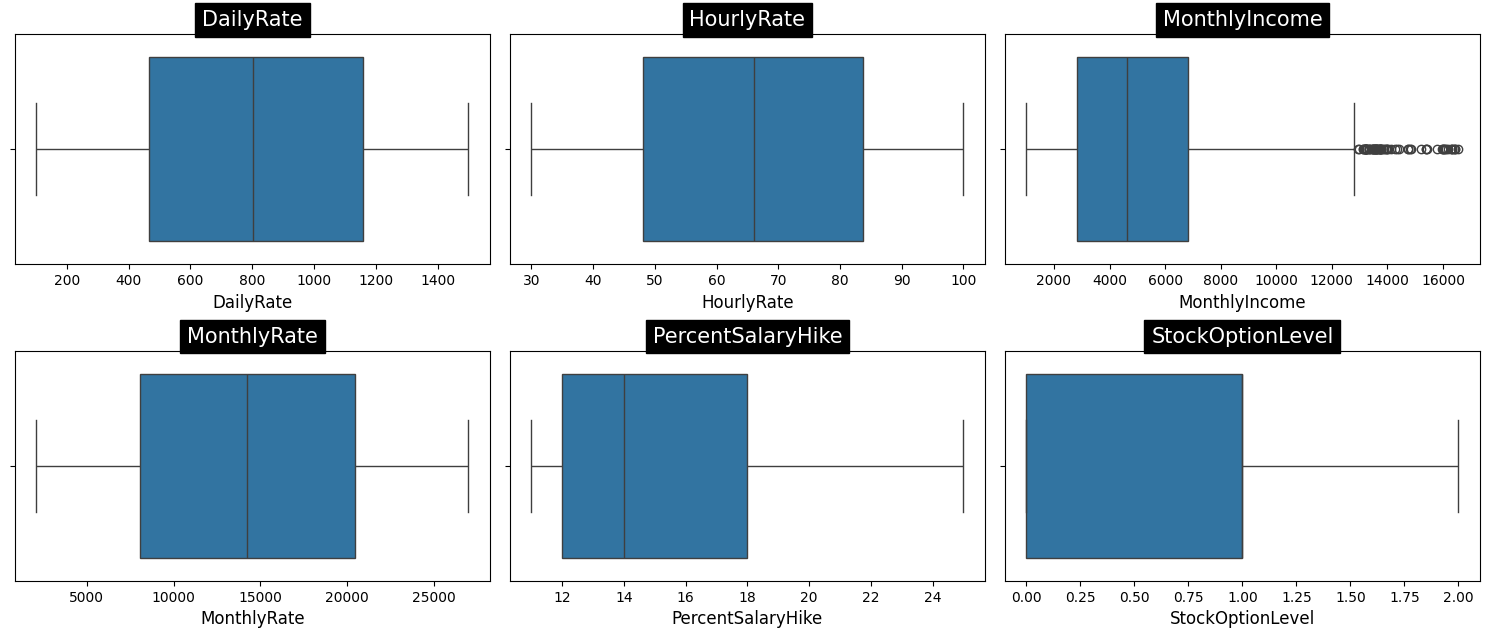

(1385, 33)

In [ ]:
#Tính IQR cho monthly_icome
plt.figure(figsize=(15, 25))
drop_outlier_col = salary_params
for idx, i in enumerate(drop_outlier_col):
    plt.subplot(8, 3, idx + 1)
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    new_df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]
    sns.boxplot(x=i, data=new_df)
    plt.title(i, backgroundcolor='black', color='white', fontsize=15)
    plt.xlabel(i, size=12)

plt.tight_layout()
plt.show()
new_df.shape

In [ ]:
df.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'Attrition_Yes', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'OverTime_Yes'],
      dtype='object')

# **Machine Learning Models**

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [ ]:
# Xác định X và y
y=df['Attrition_Yes']
X=df.drop('Attrition_Yes',axis=1)
# Thêm hệ số hồi quy cho biến độc lập.
X=sm.add_constant(X)
#Tách tập dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model=sm.Logit(y_train,X_train,random_state=0)
result=model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          Attrition_Yes   No. Observations:                 1019
Model:                          Logit   Df Residuals:                      986
Method:                           MLE   Df Model:                           32
Date:                Sun, 31 Mar 2024   Pseudo R-squ.:                     inf
Time:                        04:29:38   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 3.2389      1.631      1.985 

In [ ]:
# Lấy số liệu thống kê
stat_df=pd.DataFrame({'coefficients':result.params, 'p-value': result.pvalues, 'odds_ratio': np.exp(result.params)})
stat_df
# Điều kiện cho tham số có ý nghĩa
significant_params=stat_df[stat_df['p-value']<=0.05].index
significant_params= significant_params.drop('const')
significant_params


Index(['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked',
       'StockOptionLevel', 'WorkLifeBalance',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Gender_Male', 'MaritalStatus_Married', 'OverTime_Yes'],
      dtype='object')

In [ ]:
print('Total number of parameters: %s '%len(X.keys()) )
print('Number of Significant Parameters: %s'%(len(significant_params)))
stat_df.loc[significant_params].sort_values('odds_ratio', ascending=False)['odds_ratio']


Total number of parameters: 33 
Number of Significant Parameters: 15


BusinessTravel_Travel_Frequently    7.116869
OverTime_Yes                        5.801122
BusinessTravel_Travel_Rarely        2.425846
Gender_Male                         1.788412
NumCompaniesWorked                  1.155952
DistanceFromHome                    1.058264
DailyRate                           0.999463
Age                                 0.970836
EnvironmentSatisfaction             0.680745
JobSatisfaction                     0.676022
WorkLifeBalance                     0.639180
JobInvolvement                      0.544572
StockOptionLevel                    0.534541
MaritalStatus_Married               0.489817
JobLevel                            0.463084
Name: odds_ratio, dtype: float64

# Odds Ratio

In [ ]:
stat_df.loc[significant_params].sort_values('odds_ratio', ascending=False)['odds_ratio']

BusinessTravel_Travel_Frequently    7.116869
OverTime_Yes                        5.801122
BusinessTravel_Travel_Rarely        2.425846
Gender_Male                         1.788412
NumCompaniesWorked                  1.155952
DistanceFromHome                    1.058264
DailyRate                           0.999463
Age                                 0.970836
EnvironmentSatisfaction             0.680745
JobSatisfaction                     0.676022
WorkLifeBalance                     0.639180
JobInvolvement                      0.544572
StockOptionLevel                    0.534541
MaritalStatus_Married               0.489817
JobLevel                            0.463084
Name: odds_ratio, dtype: float64

In [ ]:
y_pred=result.predict(X_test)

# ROC curve


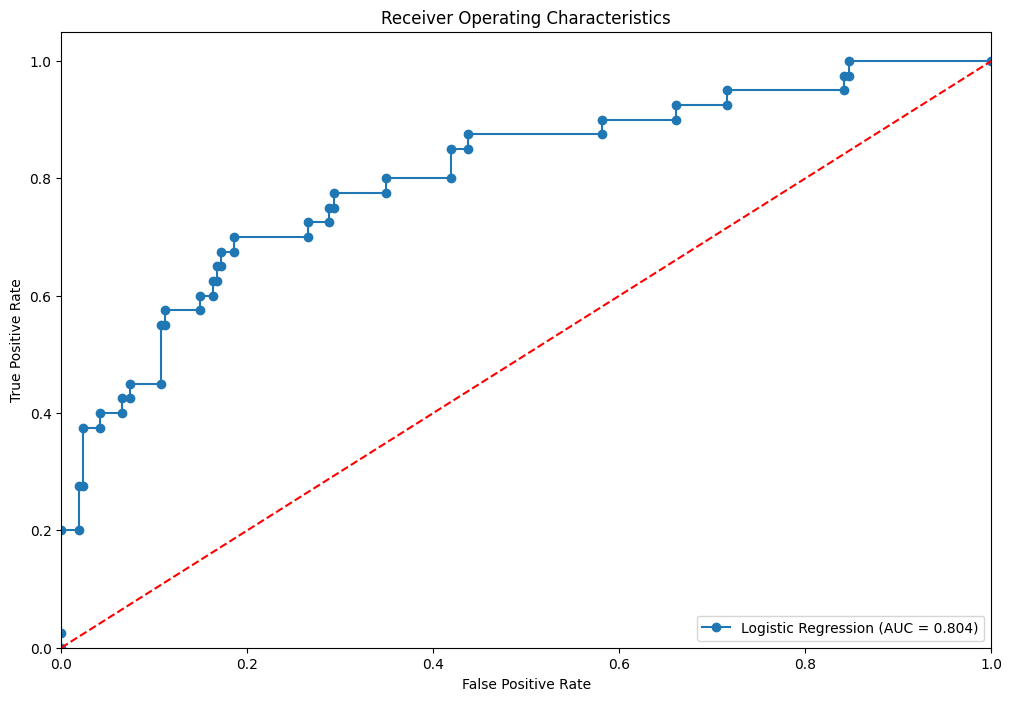

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# Ở đây bạn cần có y_pred từ mô hình logistic regression của bạn
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
logit_roc_auc = roc_auc_score(y_test, y_pred)

# Sau đó, bạn có thể vẽ ROC curve:
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.3f)' % logit_roc_auc, marker='o')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim(0, 1)
plt.ylim(0, 1.05)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Chuyển đổi y thành dạng nhị phân. Ở đây 0.5 chính là ngưỡng
opt_thr=0.5
y_pred=result.predict(X_test)
y_pred= np.where(y_pred>opt_thr,1,0)


# Accuracy Measurement


Text(50.722222222222214, 0.5, 'Predicted Output')

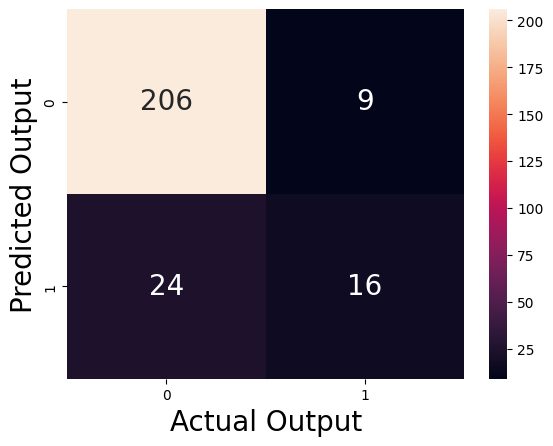

In [ ]:
# Xây dựng confusion Matrix
cm= confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm, annot=True, fmt="0", annot_kws={"size":20})
plt.xlabel('Actual Output', fontsize=20)
plt.ylabel('Predicted Output', fontsize=20)


In [ ]:
# Báo cáo phân lớp
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.96      0.93       215
           1       0.64      0.40      0.49        40

    accuracy                           0.87       255
   macro avg       0.77      0.68      0.71       255
weighted avg       0.86      0.87      0.86       255



In [ ]:
# Xác định x và y
y=df['Attrition_Yes']
X=df[significant_params]
X=sm.add_constant(X)
#Chia bộ dữ liệu thành train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model=sm.Logit(y_train,X_train)
result=model.fit()
print(result.summary())
# Lấy số liệu thống kê
stat_df=pd.DataFrame({'coefficients':result.params, 'p-value': result.pvalues, 'odds_ratio': np.exp(result.params)})
# Điều kiện cho các tham số có ý nghĩa
significant_params=stat_df[stat_df['p-value']<=0.05].index
significant_params= significant_params.drop('const')
significant_params


Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          Attrition_Yes   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1160
Method:                           MLE   Df Model:                           15
Date:                Sun, 31 Mar 2024   Pseudo R-squ.:                     inf
Time:                        04:59:37   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                3.2216      0.829      3.888    

Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'StockOptionLevel',
       'WorkLifeBalance', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'OverTime_Yes'],
      dtype='object')

In [ ]:
print('Total number of parameters: %s '%len(X.keys()) )
print('Number of Significant Parameters: %s'%(len(significant_params)))
stat_df.loc[significant_params].sort_values('odds_ratio', ascending=False)['odds_ratio']


Total number of parameters: 16 
Number of Significant Parameters: 12


OverTime_Yes                        4.967583
BusinessTravel_Travel_Frequently    4.532739
BusinessTravel_Travel_Rarely        2.198509
NumCompaniesWorked                  1.171781
DistanceFromHome                    1.042531
Age                                 0.945708
WorkLifeBalance                     0.736647
JobSatisfaction                     0.727472
EnvironmentSatisfaction             0.723479
JobLevel                            0.653809
StockOptionLevel                    0.612137
JobInvolvement                      0.592946
Name: odds_ratio, dtype: float64